In [1]:
# trabalhando com datas

In [2]:
# importando bibliotecas necessárias

from datetime import datetime                              # trabalhar com datas
from dateutil import parser                                # trabalhar com arquivos 
import numpy as np                                         # calculos matematicos
import pandas as pd                                        # manipulação de dados
import matplotlib.pyplot as plt                            # plotagem de graficos
from matplotlib.pylab import rcParams                      # configuracao de graficos
from pandas.plotting import register_matplotlib_converters # configuracao de graficos

In [3]:
# criando uma variável datetime

dt = datetime(year= 2019, 
              month= 11,
              day= 1)
dt

datetime.datetime(2019, 11, 1, 0, 0)

In [4]:
# verificando o tipo da variável

print(type(dt))

<class 'datetime.datetime'>


In [5]:
# trabalhando com datas em formato string

date = parser.parse('26th of November, 2019')
date

datetime.datetime(2019, 11, 26, 0, 0)

In [6]:
# data como array

date = np.array('2019-11-02', dtype= 'datetime64[D]')

In [7]:
# proximos 12 dias

date + np.arange(12)

array(['2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05',
       '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
       '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13'],
      dtype='datetime64[D]')

In [8]:
# importação de dados com pandas

serie_ = pd.read_csv('./data/female_birth.csv', 
                      header=0, 
                      parse_dates=[0], 
                      index_col=0, 
                      squeeze=True)
# nascimentos de meninas em 1959 na california

In [9]:
# visualizando o tipo da variável

type(serie_)

pandas.core.series.Series

In [10]:
print(serie_.head())

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64


In [11]:
# tamanho da série

serie_.shape

(366,)

In [12]:
# decrições estatísticas da série

serie_.describe()

count     366.000000
mean       47.218579
std       100.472534
min        23.000000
25%        37.000000
50%        42.000000
75%        46.000000
max      1959.000000
Name: Daily total female births in California, 1959, dtype: float64

In [13]:
# configurando os parametros dos graficos

rcParams['figure.figsize'] = 15, 6

In [14]:
# importação dos dados de passageiros de avião

data = pd.read_csv('./data/AirPassengers.csv')

In [15]:
# visualizando os primeiros registros

data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
# carregando os dados e transformando em uma series temporal

dataparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
date = pd.read_csv('./data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dataparse)

<ipython-input-16-b365fd713494>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dataparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [17]:
# visualizando os primeiros registros em formato de serie temporal

date.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
# tipo de dados dos indices da série temporal

date.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

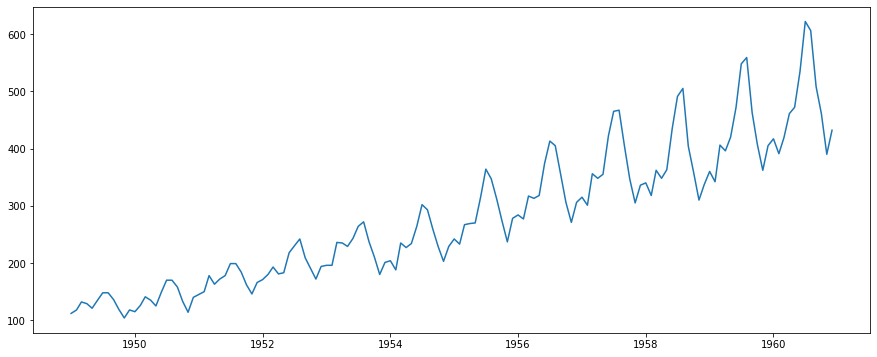

In [19]:
# visualizando graficamente a série temporal

register_matplotlib_converters()
plt.plot(date);

In [20]:
# prepocessamento de dados

In [30]:
# importando os dados terremotos na italia entre 2016-08-24 e 2016-11-30

df = pd.read_csv('./data/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')

In [31]:
# visualizando os primeiros registros

df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [32]:
# visualizando os tipos de dados

df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [33]:
# convertendo os dados do indice para datetime

df.index = pd.to_datetime(df.index)

In [34]:
# descrição estatística dos dados

df.describe()

,Latitude,Longitude,Depth/Km,Magnitude
count,8086.000000,8086.000000,8086.000000,8086.000000
mean,42.829557,13.161034,9.968328,2.398368
std,0.125927,0.083058,2.194064,0.426381
min,41.581300,12.537700,0.200000,2.000000
25%,42.751350,13.103200,8.900000,2.100000
50%,42.821800,13.160700,9.900000,2.300000
75%,42.911000,13.215650,10.800000,2.600000
max,43.927300,13.852500,47.900000,6.500000


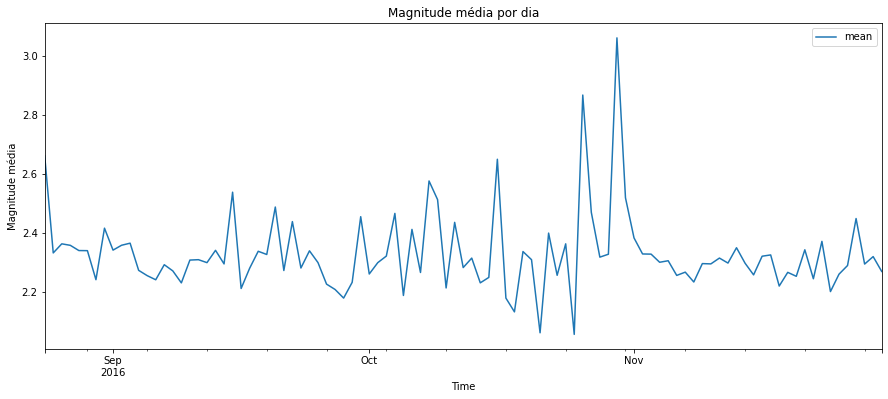

In [35]:
# visualização grafica dos dados

# magnitude média por dia
df['Magnitude'].resample('D').apply([np.mean]).plot()
plt.title('Magnitude média por dia')
plt.ylabel('Magnitude média')
plt.show()

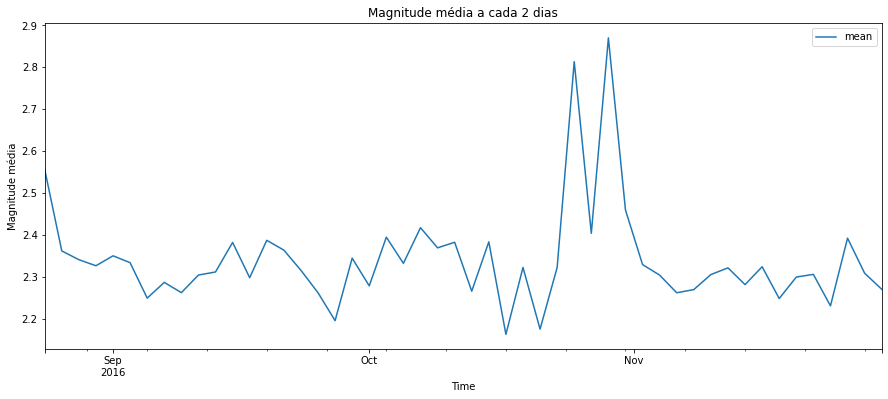

In [36]:
# magnitude média a cada 2 dias

df['Magnitude'].resample('2D').apply([np.mean]).plot()
plt.title('Magnitude média a cada 2 dias')
plt.ylabel('Magnitude média')
plt.show()

In [39]:
# magnitude maior que 3

mag3 = df.loc[df['Magnitude'] >= 3.0, 'Magnitude']
mag3.head()

Time
2016-08-24 03:36:32.000    6.0
2016-08-24 03:37:26.580    4.5
2016-08-24 03:40:46.590    3.8
2016-08-24 03:41:38.900    3.9
2016-08-24 03:42:07.170    3.6
Name: Magnitude, dtype: float64

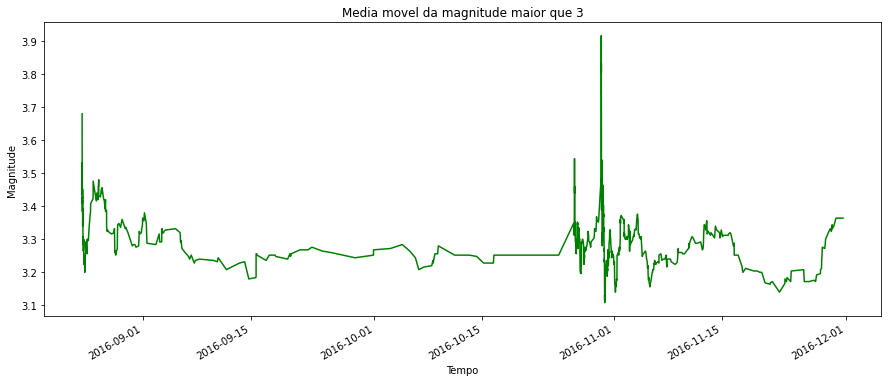

In [40]:
# média móvel de magnitude maior que 3

pd.Series.rolling(mag3, window=25).mean().plot(style='-g')
plt.title('Media movel da magnitude maior que 3')
plt.xlabel('Tempo')
plt.ylabel('Magnitude')
plt.show();

In [41]:
# importando dados

data = pd.read_csv('./data/avocado.csv', parse_dates=['Date'], index_col='Date')

In [43]:
# visualizando os primeiros registros

data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [50]:
# agrupamento dos dados por dia e visualização

summer = data.groupby('Date')['Total Volume'].mean().reset_index()
summer.head()

,Date,Total Volume
0,2015-01-04,7.840216e+05
1,2015-01-11,7.273686e+05
2,2015-01-18,7.258221e+05
3,2015-01-25,7.080211e+05
4,2015-02-01,1.106048e+06


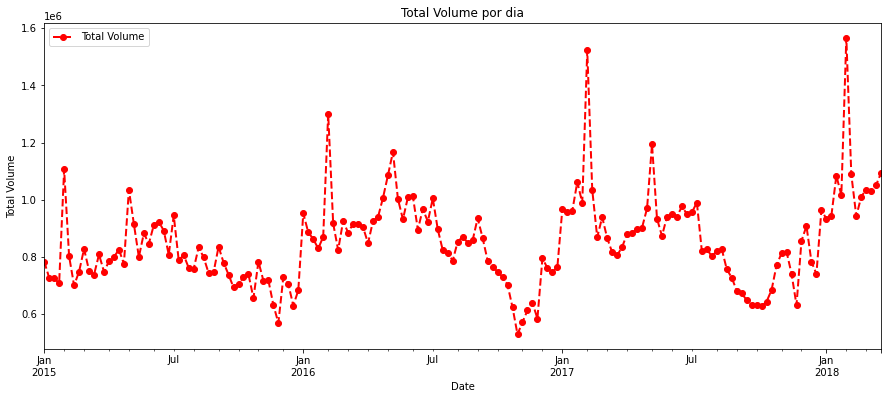

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15,6))
summer.set_index('Date').plot(ax=ax, marker='o', linestyle='--', color='red', linewidth=2)
plt.title('Total Volume por dia')
plt.ylabel('Total Volume')
plt.show();

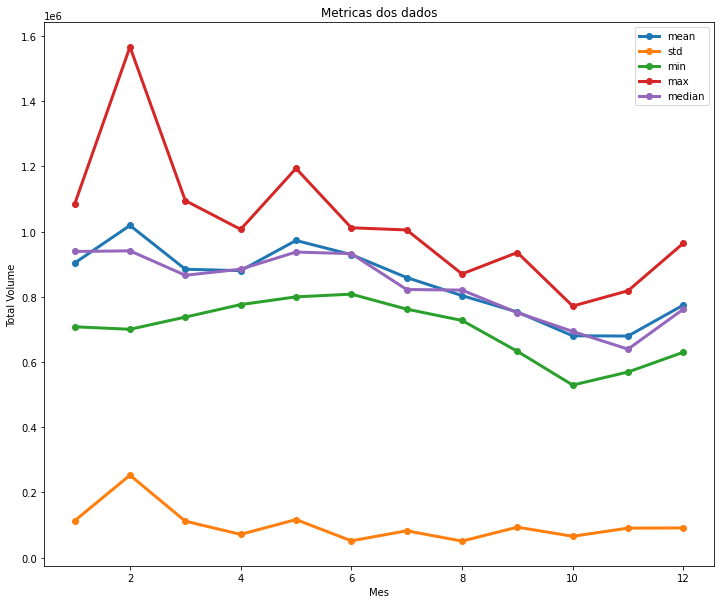

In [55]:
# metricas dos dados

fig, ax = plt.subplots(1, 1, figsize=(12,10))
(summer.set_index('Date')
    .assign(month=lambda df: df.index.month)
    .groupby('month')['Total Volume'].agg(['mean', 'std', 'min', 'max', 'median'])
    .plot(ax=ax, marker='o', linewidth=3)
    )
ax.set_xlabel('Mes')
ax.set_ylabel('Total Volume')
plt.title('Metricas dos dados')
plt.show();